<a href="https://colab.research.google.com/github/jayantc14/News-Classification/blob/main/LRFAKENEWS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
fake  = pd.read_excel("/content/drive/MyDrive/IIM/LIWC2015 Results (Fake).xlsx")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
fake

,title,text,subject,date,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,number,quant,posemo,negemo,discrep,tentat,certain,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",504,78.35,82.45,13.87,19.82,18.00,20.44,72.02,4.76,1.79,4.17,4.56,2.18,0.40,1.79,2.38,0.60,2.78,0.99,0.40,2.78,7.14,1.59
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",316,95.00,71.55,16.64,13.03,28.73,27.85,72.47,1.27,1.27,0.95,1.90,0.00,1.58,0.32,1.58,1.90,6.33,0.63,0.63,5.38,2.85,0.95
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",612,85.18,78.84,18.06,12.71,21.10,22.55,66.50,2.61,0.49,1.47,2.45,0.49,1.31,0.65,1.96,1.14,2.94,1.31,0.49,3.10,5.23,0.49
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",478,85.90,59.09,22.80,25.77,29.88,22.38,67.15,3.77,1.88,1.26,1.26,1.46,0.84,2.09,2.51,0.84,1.46,0.42,0.63,3.35,7.32,0.42
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",422,92.60,88.19,32.32,43.00,22.21,18.72,87.20,0.71,1.18,3.08,2.13,0.47,1.42,0.71,3.79,0.47,3.08,0.24,0.47,4.50,8.06,1.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23456,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",539,96.34,69.18,16.74,46.26,49.00,28.01,71.99,1.11,2.04,3.90,2.78,1.30,2.60,0.93,2.60,0.74,3.15,0.93,0.37,5.19,3.71,0.37
23457,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",305,94.03,68.85,14.89,56.75,27.73,19.02,73.44,3.28,1.97,2.95,1.31,0.33,1.97,0.33,0.66,2.30,5.57,2.30,0.33,3.93,6.23,0.98
23458,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",4277,90.88,62.65,33.24,22.15,38.88,22.66,74.77,1.59,1.99,2.48,2.71,1.43,2.22,1.54,1.71,1.68,4.68,0.77,1.03,2.83,5.94,1.52
23459,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",477,91.99,68.51,25.14,49.16,47.70,20.34,72.54,4.40,2.31,2.52,1.26,0.63,1.05,2.10,2.10,2.10,3.14,1.68,1.05,3.77,7.13,0.84


In [ ]:
fake[fake.columns[4]] = fake[fake.columns[4]].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int).dropna()

In [ ]:
fake.dropna(inplace = True)

In [ ]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23461 entries, 0 to 23460
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         23461 non-null  object 
 1   text          23461 non-null  object 
 2   subject       23461 non-null  object 
 3   date          23461 non-null  object 
 4   WC            23461 non-null  int64  
 5   Analytic      23461 non-null  float64
 6   Clout         23461 non-null  float64
 7   Authentic     23461 non-null  float64
 8   Tone          23461 non-null  float64
 9   WPS           23461 non-null  float64
 10  Sixltr        23461 non-null  float64
 11  Dic           23461 non-null  float64
 12  number        23461 non-null  float64
 13  quant         23461 non-null  float64
 14  posemo        23461 non-null  float64
 15  negemo        23461 non-null  float64
 16  discrep       23461 non-null  float64
 17  tentat        23461 non-null  float64
 18  certain       23461 non-nu

In [ ]:
fake.isnull().sum()

title           0
text            0
subject         0
date            0
WC              0
Analytic        0
Clout           0
Authentic       0
Tone            0
WPS             0
Sixltr          0
Dic             0
number          0
quant           0
posemo          0
negemo          0
discrep         0
tentat          0
certain         0
affiliation     0
achieve         0
power           0
reward          0
risk            0
focuspast       0
focuspresent    0
focusfuture     0
dtype: int64

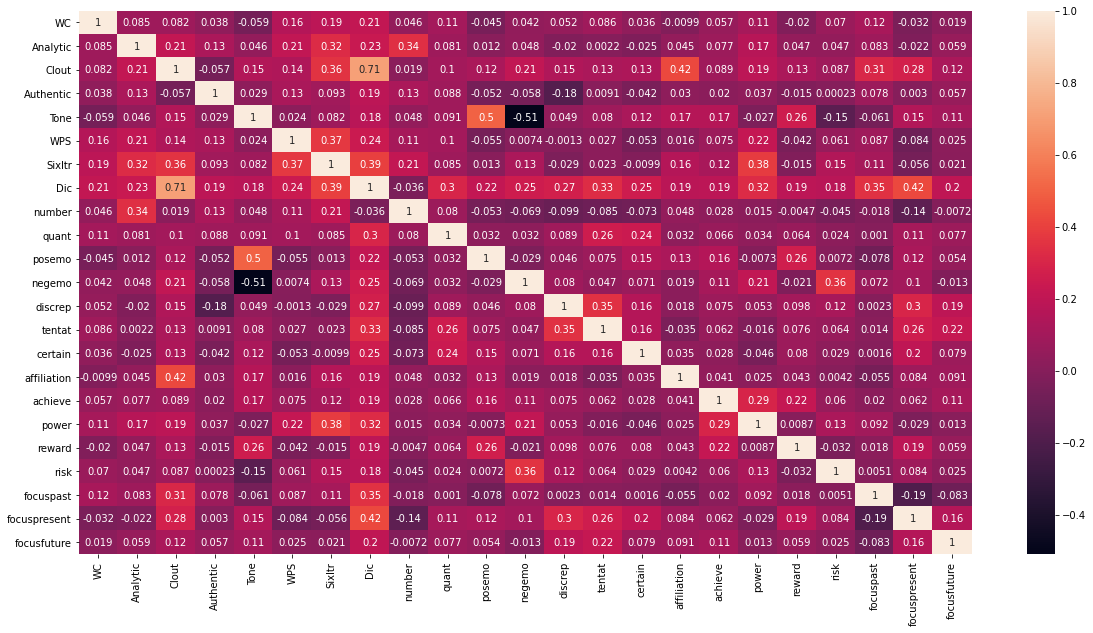

In [ ]:
# Let's see the correlation matrix 
X = fake.to_numpy()
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(fake.corr(),annot = True)

In [ ]:
true  = pd.read_excel("/content/drive/MyDrive/IIM/LIWC2015 Results (True).xlsx")

In [ ]:
true

,title,text,subject,date,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,number,quant,posemo,negemo,discrep,tentat,certain,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",749,97.02,73.93,22.27,35.07,23.41,28.44,77.97,2.80,1.34,1.60,1.07,1.47,1.20,0.27,2.00,1.20,5.87,0.80,0.93,4.01,6.81,2.00
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",627,96.86,56.98,13.98,49.52,20.23,32.85,73.68,2.39,1.28,2.71,1.44,2.07,0.96,0.48,0.96,0.96,8.61,0.80,1.12,3.83,5.10,2.07
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",457,94.73,70.79,16.26,29.43,24.05,27.35,77.90,0.88,1.75,1.09,0.88,2.19,3.94,0.66,2.19,0.66,6.13,0.44,0.00,5.47,5.47,1.97
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",379,96.40,76.99,12.12,55.62,22.29,32.19,73.35,2.11,0.53,2.11,0.53,0.53,1.32,0.26,1.58,1.32,6.60,0.53,0.00,6.33,3.43,0.53
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",860,96.29,57.83,22.73,15.88,22.05,27.21,75.93,4.19,3.14,1.16,1.86,0.47,0.93,0.81,0.93,0.81,3.60,0.70,0.93,3.49,5.47,0.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",465,94.87,85.40,15.22,19.36,29.06,27.31,78.28,2.15,1.72,2.80,3.23,0.65,0.22,1.51,6.88,3.23,6.24,1.29,0.65,5.81,4.30,1.29
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",124,98.59,74.07,49.78,40.25,20.67,34.68,75.81,2.42,3.23,0.81,0.00,0.00,2.42,0.00,0.81,1.61,3.23,0.81,0.00,8.87,0.81,0.00
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",326,95.57,65.51,37.06,60.66,20.38,26.07,79.45,2.45,2.76,2.76,0.92,0.00,2.45,0.61,0.00,2.76,4.60,0.61,0.92,3.68,7.67,0.92
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",204,93.74,78.36,26.08,71.75,25.50,27.45,79.90,1.96,0.98,3.43,0.98,0.98,1.47,1.96,1.96,2.45,2.45,0.49,0.98,7.84,4.41,0.00


In [ ]:
true.isnull().sum()

title           0
text            0
subject         0
date            0
WC              0
Analytic        0
Clout           0
Authentic       0
Tone            0
WPS             0
Sixltr          0
Dic             0
number          0
quant           0
posemo          0
negemo          0
discrep         0
tentat          0
certain         0
affiliation     0
achieve         0
power           0
reward          0
risk            0
focuspast       0
focuspresent    0
focusfuture     0
dtype: int64

In [ ]:
true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         21417 non-null  object 
 1   text          21417 non-null  object 
 2   subject       21417 non-null  object 
 3   date          21417 non-null  object 
 4   WC            21417 non-null  int64  
 5   Analytic      21417 non-null  float64
 6   Clout         21417 non-null  float64
 7   Authentic     21417 non-null  float64
 8   Tone          21417 non-null  float64
 9   WPS           21417 non-null  float64
 10  Sixltr        21417 non-null  float64
 11  Dic           21417 non-null  float64
 12  number        21417 non-null  float64
 13  quant         21417 non-null  float64
 14  posemo        21417 non-null  float64
 15  negemo        21417 non-null  float64
 16  discrep       21417 non-null  float64
 17  tentat        21417 non-null  float64
 18  certain       21417 non-nu

In [ ]:
true['target'] = 1


fake['target'] = 0


df = pd.concat([true,fake])


df.reset_index(inplace= True,drop = True)



In [ ]:
df

,title,text,subject,date,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,number,quant,posemo,negemo,discrep,tentat,certain,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",749,97.02,73.93,22.27,35.07,23.41,28.44,77.97,2.80,1.34,1.60,1.07,1.47,1.20,0.27,2.00,1.20,5.87,0.80,0.93,4.01,6.81,2.00,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",627,96.86,56.98,13.98,49.52,20.23,32.85,73.68,2.39,1.28,2.71,1.44,2.07,0.96,0.48,0.96,0.96,8.61,0.80,1.12,3.83,5.10,2.07,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",457,94.73,70.79,16.26,29.43,24.05,27.35,77.90,0.88,1.75,1.09,0.88,2.19,3.94,0.66,2.19,0.66,6.13,0.44,0.00,5.47,5.47,1.97,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",379,96.40,76.99,12.12,55.62,22.29,32.19,73.35,2.11,0.53,2.11,0.53,0.53,1.32,0.26,1.58,1.32,6.60,0.53,0.00,6.33,3.43,0.53,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",860,96.29,57.83,22.73,15.88,22.05,27.21,75.93,4.19,3.14,1.16,1.86,0.47,0.93,0.81,0.93,0.81,3.60,0.70,0.93,3.49,5.47,0.23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44873,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",539,96.34,69.18,16.74,46.26,49.00,28.01,71.99,1.11,2.04,3.90,2.78,1.30,2.60,0.93,2.60,0.74,3.15,0.93,0.37,5.19,3.71,0.37,0
44874,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",305,94.03,68.85,14.89,56.75,27.73,19.02,73.44,3.28,1.97,2.95,1.31,0.33,1.97,0.33,0.66,2.30,5.57,2.30,0.33,3.93,6.23,0.98,0
44875,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",4277,90.88,62.65,33.24,22.15,38.88,22.66,74.77,1.59,1.99,2.48,2.71,1.43,2.22,1.54,1.71,1.68,4.68,0.77,1.03,2.83,5.94,1.52,0
44876,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",477,91.99,68.51,25.14,49.16,47.70,20.34,72.54,4.40,2.31,2.52,1.26,0.63,1.05,2.10,2.10,2.10,3.14,1.68,1.05,3.77,7.13,0.84,0


In [ ]:
pip install textstat

     |████████████████████████████████| 102kB 4.4MB/s 
     |████████████████████████████████| 1.9MB 8.9MB/s 


In [ ]:
import textstat

In [ ]:
df['text']=df['text']+" "+df['title']
df.drop(['subject','date','title'],axis = 1,inplace = True)

In [ ]:
df2 = df['text'].to_numpy(copy = False)

In [ ]:
df['FREScore'] = 0
df['Smogscore'] = 0
df['Gunningfog'] = 0
df['SentenceCount'] = 0
df['LexiconCount'] = 0
n = len(df2)
for epoch in range(n):
  t = textstat.flesch_reading_ease(df2[epoch])
  df.loc[epoch,'FREScore']  = t
  t1 = textstat.smog_index(df2[epoch])
  df.loc[epoch,'Smogscore']  = t1
  t2 = textstat.gunning_fog(df2[epoch])
  df.loc[epoch,'Gunningfog']  = t2
  t3 = textstat.sentence_count(df2[epoch])
  df.loc[epoch,'SentenceCount']  = t3
  t4 = textstat.lexicon_count(df2[epoch], removepunct=True)
  df.loc[epoch,'LexiconCount']  = t4
  

In [ ]:
df

,text,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,number,quant,posemo,negemo,discrep,tentat,certain,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,target,FREScore,Smogscore,Gunningfog,SentenceCount,LexiconCount
0,WASHINGTON (Reuters) - The head of a conservat...,749,97.02,73.93,22.27,35.07,23.41,28.44,77.97,2.80,1.34,1.60,1.07,1.47,1.20,0.27,2.00,1.20,5.87,0.80,0.93,4.01,6.81,2.00,1,42.04,14.7,14.83,26,755
1,WASHINGTON (Reuters) - Transgender people will...,627,96.86,56.98,13.98,49.52,20.23,32.85,73.68,2.39,1.28,2.71,1.44,2.07,0.96,0.48,0.96,0.96,8.61,0.80,1.12,3.83,5.10,2.07,1,32.57,17.8,16.57,21,630
2,WASHINGTON (Reuters) - The special counsel inv...,457,94.73,70.79,16.26,29.43,24.05,27.35,77.90,0.88,1.75,1.09,0.88,2.19,3.94,0.66,2.19,0.66,6.13,0.44,0.00,5.47,5.47,1.97,1,39.91,14.9,16.05,15,466
3,WASHINGTON (Reuters) - Trump campaign adviser ...,379,96.40,76.99,12.12,55.62,22.29,32.19,73.35,2.11,0.53,2.11,0.53,0.53,1.32,0.26,1.58,1.32,6.60,0.53,0.00,6.33,3.43,0.53,1,45.49,14.6,13.99,15,384
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,860,96.29,57.83,22.73,15.88,22.05,27.21,75.93,4.19,3.14,1.16,1.86,0.47,0.93,0.81,0.93,0.81,3.60,0.70,0.93,3.49,5.47,0.23,1,50.80,13.9,14.40,30,862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44873,21st Century Wire says As 21WIRE reported earl...,539,96.34,69.18,16.74,46.26,49.00,28.01,71.99,1.11,2.04,3.90,2.78,1.30,2.60,0.93,2.60,0.74,3.15,0.93,0.37,5.19,3.71,0.37,0,22.35,19.9,23.95,11,532
44874,21st Century Wire says It s a familiar theme. ...,305,94.03,68.85,14.89,56.75,27.73,19.02,73.44,3.28,1.97,2.95,1.31,0.33,1.97,0.33,0.66,2.30,5.57,2.30,0.33,3.93,6.23,0.98,0,51.41,13.5,14.35,11,309
44875,Patrick Henningsen 21st Century WireRemember ...,4277,90.88,62.65,33.24,22.15,38.88,22.66,74.77,1.59,1.99,2.48,2.71,1.43,2.22,1.54,1.71,1.68,4.68,0.77,1.03,2.83,5.94,1.52,0,28.24,16.7,19.93,98,4178
44876,21st Century Wire says Al Jazeera America will...,477,91.99,68.51,25.14,49.16,47.70,20.34,72.54,4.40,2.31,2.52,1.26,0.63,1.05,2.10,2.10,2.10,3.14,1.68,1.05,3.77,7.13,0.84,0,27.16,16.3,22.94,9,468


In [ ]:
##lexicon count is basically word count it might be dominating will have to see
df = df.drop(['text'],axis = 1)


In [ ]:
df

,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,number,quant,posemo,negemo,discrep,tentat,certain,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,target,FREScore,Smogscore,Gunningfog,SentenceCount,LexiconCount
0,749,97.02,73.93,22.27,35.07,23.41,28.44,77.97,2.80,1.34,1.60,1.07,1.47,1.20,0.27,2.00,1.20,5.87,0.80,0.93,4.01,6.81,2.00,1,42.04,14.7,14.83,26,755
1,627,96.86,56.98,13.98,49.52,20.23,32.85,73.68,2.39,1.28,2.71,1.44,2.07,0.96,0.48,0.96,0.96,8.61,0.80,1.12,3.83,5.10,2.07,1,32.57,17.8,16.57,21,630
2,457,94.73,70.79,16.26,29.43,24.05,27.35,77.90,0.88,1.75,1.09,0.88,2.19,3.94,0.66,2.19,0.66,6.13,0.44,0.00,5.47,5.47,1.97,1,39.91,14.9,16.05,15,466
3,379,96.40,76.99,12.12,55.62,22.29,32.19,73.35,2.11,0.53,2.11,0.53,0.53,1.32,0.26,1.58,1.32,6.60,0.53,0.00,6.33,3.43,0.53,1,45.49,14.6,13.99,15,384
4,860,96.29,57.83,22.73,15.88,22.05,27.21,75.93,4.19,3.14,1.16,1.86,0.47,0.93,0.81,0.93,0.81,3.60,0.70,0.93,3.49,5.47,0.23,1,50.80,13.9,14.40,30,862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44873,539,96.34,69.18,16.74,46.26,49.00,28.01,71.99,1.11,2.04,3.90,2.78,1.30,2.60,0.93,2.60,0.74,3.15,0.93,0.37,5.19,3.71,0.37,0,22.35,19.9,23.95,11,532
44874,305,94.03,68.85,14.89,56.75,27.73,19.02,73.44,3.28,1.97,2.95,1.31,0.33,1.97,0.33,0.66,2.30,5.57,2.30,0.33,3.93,6.23,0.98,0,51.41,13.5,14.35,11,309
44875,4277,90.88,62.65,33.24,22.15,38.88,22.66,74.77,1.59,1.99,2.48,2.71,1.43,2.22,1.54,1.71,1.68,4.68,0.77,1.03,2.83,5.94,1.52,0,28.24,16.7,19.93,98,4178
44876,477,91.99,68.51,25.14,49.16,47.70,20.34,72.54,4.40,2.31,2.52,1.26,0.63,1.05,2.10,2.10,2.10,3.14,1.68,1.05,3.77,7.13,0.84,0,27.16,16.3,22.94,9,468


In [ ]:
y = df['target']

In [ ]:
X = df.drop(['target'],axis = 1)

In [ ]:
X =(X-X.mean())/X.std()

In [ ]:
X

,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,number,quant,posemo,negemo,discrep,tentat,certain,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,FREScore,Smogscore,Gunningfog,SentenceCount,LexiconCount
0,1.017806,0.264774,0.083406,0.199889,0.043739,-0.354650,0.513934,0.452389,0.341689,-0.246814,-0.315753,-0.611595,0.377488,-0.326619,-0.668816,0.068375,-0.225608,0.377134,-0.061018,0.254727,-0.148275,0.411368,1.200012,0.209819,0.148646,-0.509437,1.350340,1.052548
1,0.651157,0.259427,-1.108621,-0.305865,0.589114,-0.602132,1.226709,0.049311,0.130586,-0.301495,0.218564,-0.380063,0.994268,-0.533375,-0.451052,-0.617444,-0.427642,1.529501,-0.061018,0.488184,-0.229896,-0.182950,1.276397,-0.129074,0.714482,-0.274681,0.860661,0.667184
2,0.140254,0.188248,-0.137418,-0.166768,-0.169127,-0.304843,0.337761,0.445812,-0.646890,0.126835,-0.561250,-0.730489,1.117624,2.033838,-0.264397,0.193669,-0.680184,0.486483,-0.453287,-0.887986,0.513761,-0.054355,1.167276,0.133595,0.185152,-0.344838,0.273047,0.161586
3,-0.094160,0.244055,0.298604,-0.419340,0.819342,-0.441814,1.120036,0.018305,-0.013582,-0.984999,-0.070256,-0.949505,-0.588799,-0.223241,-0.679186,-0.208590,-0.124592,0.684152,-0.355220,-0.887986,0.903727,-0.763367,-0.404074,0.333280,0.130393,-0.622768,0.273047,-0.091213
4,1.351395,0.240379,-1.048844,0.227952,-0.680534,-0.460491,0.315133,0.260716,1.057380,1.393597,-0.527554,-0.117244,-0.650477,-0.559219,-0.108851,-0.637227,-0.553913,-0.577565,-0.169981,0.254727,-0.384069,-0.054355,-0.731439,0.523304,0.002624,-0.567452,1.742083,1.382419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44873,0.386690,0.242050,-0.250643,-0.137484,0.466075,1.636873,0.444435,-0.109477,-0.528467,0.391123,0.791390,0.458456,0.202734,0.879454,0.015586,0.464040,-0.612839,-0.766822,0.080635,-0.433358,0.386795,-0.666052,-0.578669,-0.494807,1.097790,0.721011,-0.118696,0.365058
44874,-0.316553,0.164855,-0.273850,-0.250348,0.861991,-0.018449,-1.008592,0.026761,0.588834,0.327330,0.334092,-0.461412,-0.794393,0.336721,-0.606598,-0.815276,0.700378,0.250962,1.573437,-0.482507,-0.184551,0.209787,0.086973,0.545133,-0.070387,-0.574198,-0.118696,-0.322431
44875,11.620549,0.059589,-0.709872,0.869143,-0.443891,0.849292,-0.420270,0.151725,-0.281322,0.345556,0.107850,0.414653,0.336370,0.552091,0.648140,-0.122863,0.178459,-0.123347,-0.093707,0.377599,-0.683345,0.108996,0.676229,-0.284027,0.513701,0.178643,8.401710,11.605357
44876,0.200361,0.096683,-0.297761,0.374981,0.575527,1.535702,-0.795244,-0.057800,1.165506,0.637185,0.127104,-0.492700,-0.486003,-0.455841,1.228846,0.134319,0.532017,-0.771028,0.897862,0.402173,-0.257103,0.522586,-0.065798,-0.322676,0.440690,0.584744,-0.314567,0.167752


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:942: RuntimeWarning: divide by zero encountered in true_divide
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:942: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:943: RuntimeWarning: divide by zero encountered in log
  n * np.log(1 - mu)) * var_weights


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                31414
Model:                            GLM   Df Residuals:                    31385
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 17 Jun 2021   Deviance:                          inf
Time:                        19:22:41   Pearson chi2:                 4.50e+15
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.4591      0.018    -25.266      0.000      -0.495      -0.424
WC              -10.0550      0.842    -11.936      0.000     -11.706      -8.404
Analytic          1.3487      0.067     20.169      0.000       1.218       1.480
Clout            -0.2831      0.028    -10.187      0.000      -0.338      -0.229
Authentic         0.5079      0.021     23.816      0.000       0.466       0.550
Tone              0.3052      0.046      6.659      0.000       0.215       0.395
WPS              -2.3998      0.036    -66.722      0.000      -2.470      -2.329
Sixltr            1.2810      0.031     41.071      0.000       1.220       1.342
Dic              -0.1726      0.040     -4.350      0.000      -0.250      -0.095
number           -0.1257      0.020     -6.331      0.000      -0.165      -0.087
quant             0.2086      0.020     10.563      0.000       0.170       0.247
posemo           -0.3580      0.053     -6.788      0.000      -0.461      -0.255
negemo           -0.3377      0.034     -9.904      0.000      -0.405      -0.271
discrep           0.6552      0.021     31.157      0.000       0.614       0.696
tentat           -0.3742      0.022    -17.239      0.000      -0.417      -0.332
certain          -0.6797      0.025    -27.458      0.000      -0.728      -0.631
affiliation      -0.0755      0.021     -3.604      0.000      -0.117      -0.034
achieve           0.2672      0.021     12.530      0.000       0.225       0.309
power             0.5636      0.021     26.295      0.000       0.522       0.606
reward           -0.1952      0.023     -8.607      0.000      -0.240      -0.151
risk              0.2800      0.020     13.716      0.000       0.240       0.320
focuspast         0.7952      0.023     34.246      0.000       0.750       0.841
focuspresent     -0.4580      0.029    -15.939      0.000      -0.514      -0.402
focusfuture       0.4487      0.020     22.041      0.000       0.409       0.489
FREScore          1.0976      0.090     12.158      0.000       0.921       1.275
Smogscore        -0.0758      0.024     -3.181      0.001      -0.122      -0.029
Gunningfog        2.0041      0.074     27.175      0.000       1.860       2.149
SentenceCount    -0.4168      0.055     -7.642      0.000      -0.524      -0.310
LexiconCount     10.4268      0.844     12.352      0.000       8.772      12.081
=================================================================================
"""

In [ ]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predicted = model.predict(X_test)

In [ ]:
print(metrics.confusion_matrix(y_test, predicted))

[[6340  717]
 [ 574 5833]]


In [ ]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      7057
           1       0.89      0.91      0.90      6407

    accuracy                           0.90     13464
   macro avg       0.90      0.90      0.90     13464
weighted avg       0.90      0.90      0.90     13464



In [ ]:
print(model.score(X_test,y_test))

0.9041146761734997


In [ ]:
#selected_columns = selected_columns[1:].values         # Removing the dignosis column

In [ ]:
fit = sm.OLS(y, X).fit()
print(fit.summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.284
Model:                            OLS   Adj. R-squared (uncentered):              0.284
Method:                 Least Squares   F-statistic:                              636.4
Date:                Thu, 17 Jun 2021   Prob (F-statistic):                        0.00
Time:                        19:23:41   Log-Likelihood:                         -39572.
No. Observations:               44878   AIC:                                  7.920e+04
Df Residuals:                   44850   BIC:                                  7.944e+04
Df Model:                          28                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [ ]:
X

,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,number,quant,posemo,negemo,discrep,tentat,certain,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,FREScore,Smogscore,Gunningfog,SentenceCount,LexiconCount
0,1.017806,0.264774,0.083406,0.199889,0.043739,-0.354650,0.513934,0.452389,0.341689,-0.246814,-0.315753,-0.611595,0.377488,-0.326619,-0.668816,0.068375,-0.225608,0.377134,-0.061018,0.254727,-0.148275,0.411368,1.200012,0.209819,0.148646,-0.509437,1.350340,1.052548
1,0.651157,0.259427,-1.108621,-0.305865,0.589114,-0.602132,1.226709,0.049311,0.130586,-0.301495,0.218564,-0.380063,0.994268,-0.533375,-0.451052,-0.617444,-0.427642,1.529501,-0.061018,0.488184,-0.229896,-0.182950,1.276397,-0.129074,0.714482,-0.274681,0.860661,0.667184
2,0.140254,0.188248,-0.137418,-0.166768,-0.169127,-0.304843,0.337761,0.445812,-0.646890,0.126835,-0.561250,-0.730489,1.117624,2.033838,-0.264397,0.193669,-0.680184,0.486483,-0.453287,-0.887986,0.513761,-0.054355,1.167276,0.133595,0.185152,-0.344838,0.273047,0.161586
3,-0.094160,0.244055,0.298604,-0.419340,0.819342,-0.441814,1.120036,0.018305,-0.013582,-0.984999,-0.070256,-0.949505,-0.588799,-0.223241,-0.679186,-0.208590,-0.124592,0.684152,-0.355220,-0.887986,0.903727,-0.763367,-0.404074,0.333280,0.130393,-0.622768,0.273047,-0.091213
4,1.351395,0.240379,-1.048844,0.227952,-0.680534,-0.460491,0.315133,0.260716,1.057380,1.393597,-0.527554,-0.117244,-0.650477,-0.559219,-0.108851,-0.637227,-0.553913,-0.577565,-0.169981,0.254727,-0.384069,-0.054355,-0.731439,0.523304,0.002624,-0.567452,1.742083,1.382419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44873,0.386690,0.242050,-0.250643,-0.137484,0.466075,1.636873,0.444435,-0.109477,-0.528467,0.391123,0.791390,0.458456,0.202734,0.879454,0.015586,0.464040,-0.612839,-0.766822,0.080635,-0.433358,0.386795,-0.666052,-0.578669,-0.494807,1.097790,0.721011,-0.118696,0.365058
44874,-0.316553,0.164855,-0.273850,-0.250348,0.861991,-0.018449,-1.008592,0.026761,0.588834,0.327330,0.334092,-0.461412,-0.794393,0.336721,-0.606598,-0.815276,0.700378,0.250962,1.573437,-0.482507,-0.184551,0.209787,0.086973,0.545133,-0.070387,-0.574198,-0.118696,-0.322431
44875,11.620549,0.059589,-0.709872,0.869143,-0.443891,0.849292,-0.420270,0.151725,-0.281322,0.345556,0.107850,0.414653,0.336370,0.552091,0.648140,-0.122863,0.178459,-0.123347,-0.093707,0.377599,-0.683345,0.108996,0.676229,-0.284027,0.513701,0.178643,8.401710,11.605357
44876,0.200361,0.096683,-0.297761,0.374981,0.575527,1.535702,-0.795244,-0.057800,1.165506,0.637185,0.127104,-0.492700,-0.486003,-0.455841,1.228846,0.134319,0.532017,-0.771028,0.897862,0.402173,-0.257103,0.522586,-0.065798,-0.322676,0.440690,0.584744,-0.314567,0.167752


In [ ]:
X = X.drop(['WC','Dic','LexiconCount'],axis=1)

In [ ]:
fit = sm.OLS(y, X).fit()
print(fit.summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.284
Model:                            OLS   Adj. R-squared (uncentered):              0.283
Method:                 Least Squares   F-statistic:                              711.1
Date:                Thu, 17 Jun 2021   Prob (F-statistic):                        0.00
Time:                        19:25:32   Log-Likelihood:                         -39588.
No. Observations:               44878   AIC:                                  7.923e+04
Df Residuals:                   44853   BIC:                                  7.944e+04
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predicted = model.predict(X_test)

In [ ]:
print(model.score(X_test,y_test))

0.9030005941770648


In [ ]:
X = X.drop(['Smogscore'],axis = 1)

In [ ]:
fit = sm.OLS(y, X).fit()
print(fit.summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.284
Model:                            OLS   Adj. R-squared (uncentered):              0.283
Method:                 Least Squares   F-statistic:                              740.7
Date:                Thu, 17 Jun 2021   Prob (F-statistic):                        0.00
Time:                        19:28:54   Log-Likelihood:                         -39588.
No. Observations:               44878   AIC:                                  7.922e+04
Df Residuals:                   44854   BIC:                                  7.943e+04
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predicted = model.predict(X_test)

In [ ]:
print(model.score(X_test,y_test))

0.9030005941770648


In [ ]:
list(X.columns)

['Analytic',
 'Clout',
 'Authentic',
 'Tone',
 'WPS',
 'Sixltr',
 'number',
 'quant',
 'posemo',
 'negemo',
 'discrep',
 'tentat',
 'certain',
 'affiliation',
 'achieve',
 'power',
 'reward',
 'risk',
 'focuspast',
 'focuspresent',
 'focusfuture',
 'FREScore',
 'Gunningfog',
 'SentenceCount']

In [ ]:
X = X.drop(['Clout','discrep','affiliation'],axis = 1)